## Load needed moduals 

In [2]:
import numpy as np
import pandas as pd
import cryptofxns
import statsmodels.formula.api as smf
import scipy.stats as ss
from matplotlib import pyplot as plt
%matplotlib inline

## Load needed Files and Dataframes

In [3]:
endfile = '-min-haplotype-k6000.csv'
CO_df = pd.read_csv('../FILES/Crypto-GTC-counts'+endfile,index_col=0);CO_df.shape
clens = cryptofxns.chromosome_lengths;print clens
seg_drop = cryptofxns.geno_remove;print seg_drop

[2300525, 1632286, 2105722, 1783051, 1507536, 1438940, 1347778, 1194303, 1178642, 1085711, 1019830, 906713, 787979, 762695]
['SS-B377', 'SS-B385', 'SS-B410', 'SS-B411', 'SS-B560', 'SS-B395', 'SS-B594', 'SS-C273', 'SS-B879', 'SS-B885', 'SS-B593']


In [4]:
CO_df.head()

,Chr01,Chr02,Chr03,Chr04,Chr05,Chr06,Chr07,Chr08,Chr09,Chr10,Chr11,Chr12,Chr13,Chr14
SS-B307,1.0,1.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0
SS-B308,2.0,3.0,0.0,3.0,2.0,3.0,1.0,4.0,1.0,1.0,0.0,2.0,1.0,2.0
SS-B310,1.0,5.0,6.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,1.0,0.0,3.0
SS-B311,3.0,4.0,2.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0
SS-B312,4.0,6.0,3.0,5.0,3.0,2.0,4.0,3.0,1.0,3.0,3.0,2.0,1.0,1.0


In [4]:
chrlist = np.unique(CO_df.columns).tolist();
segs_in = CO_df.index.tolist();
segs_bi = list(np.concatenate(cryptofxns.axalp))
segs = [s for s in segs_in if s not in seg_drop ];print len(segs)

94


### PATCH Jan 2018

In [5]:
old_names = []
for seg in segs_bi:
    if len(seg) > 7:
        new_name = seg.split('_')[0] + '_cor'
        old_names.append(new_name)
    else:
        old_names.append(seg)
segs_bi = old_names

### Are there any segregants with zero recombination events, genome-wide?

In [6]:
for a, b in enumerate(CO_df.sum(axis=1)):
    if b == 0:
        if CO_df.index.tolist()[a] in segs:
            print CO_df.index.tolist()[a],b

### What segregants have zero recombination on given chromosomes?

In [7]:
segs_with_zero = []
for a in CO_df.index.tolist():
    if a in segs:
        COs = CO_df.T[a].tolist()
        if 0 in COs:
            #print a
            segs_with_zero.append(a)
            perchrom = []
            for b,c in enumerate(COs):
                if c == 0:
                    #print chrlist[b]
                    perchrom.append(chrlist[b])
            segs_with_zero.append(perchrom)

In [8]:
len(segs_with_zero)/2.0

54.0

In [9]:
segs_with_zero[:6]

['SS-B308',
 ['Chr03', 'Chr11'],
 'SS-B310',
 ['Chr13'],
 'SS-B316',
 ['Chr09', 'Chr10']]

In [10]:
only_chroms = []
for seg in segs_with_zero:
    for a in seg:
        if a in chrlist:
            only_chroms.append(a)   

In [11]:
only_chroms_num = [int(a[3:]) for a in only_chroms]

In [12]:
only_chroms_num[:5]

[3, 11, 13, 9, 10]

In [13]:
zero_counts_per_chrom = []
for chrom in chrlist:
    zero_counts_per_chrom.append( only_chroms_num.count(int(chrom[3:])))

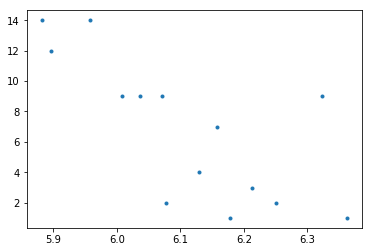

In [14]:
zero_counts_per_chrom_df = pd.DataFrame([clens,zero_counts_per_chrom],index=['Clens','ZC']).T
zero_counts_per_chrom_df
plt.plot(np.log10(zero_counts_per_chrom_df.Clens.values),zero_counts_per_chrom_df.ZC.values,'.');
#plt.plot(np.log10(zero_counts_per_chrom_df.Clens.values),zero_counts_results.predict(),'.');

In [15]:
zero_counts_results  = smf.ols(formula = 'ZC ~ clens ',data=zero_counts_per_chrom_df).fit()
print zero_counts_results.summary()

/Users/croth/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                     ZC   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     9.810
Date:                Thu, 01 Feb 2018   Prob (F-statistic):            0.00866
Time:                        11:01:03   Log-Likelihood:                -36.795
No. Observations:                  14   AIC:                             77.59
Df Residuals:                      12   BIC:                             78.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9749      3.068      5.208      0.0

### Analysis of chromosomes with zero crossovers

In [16]:
hap_filter_size = 6000
HAPFILTINT = int(hap_filter_size/1000.0)
Method = '-min'
fileendname = Method +'-Geno-k' + str(int(hap_filter_size)) + '.csv'
geno = pd.read_csv('../FILES/FiltGenotoHapFiltGeno%s'%fileendname)

In [17]:
geno.head()

,Alt,Chrom,Pos,Ref,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,...,SS-C029_Correction,SS-C031_Correction,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291
0,A,Chr01,5016.0,C,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,C,Chr01,5299.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,C,Chr01,5464.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,C,Chr01,6120.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,A,Chr01,6166.0,G,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


## Patch Jan 2018

In [18]:
old_names = []
for seg in geno.columns.tolist()[4:]:
    if len(seg) > 7:
        new_name = seg.split('_')[0] + '_cor'
        old_names.append(new_name)
    else:
        old_names.append(seg)
geno.columns = geno.columns.tolist()[:4] + old_names

In [19]:
len(segs_with_zero)/2.0

54.0

In [20]:
segs_wz = [segs_with_zero[i] for i in np.arange(0,len(segs_with_zero),2)]

In [21]:
segs_wz[:5]

['SS-B308', 'SS-B310', 'SS-B316', 'SS-B350', 'SS-B354']

In [22]:
len(segs_wz)

54

In [23]:
segs_wz_ch = [segs_with_zero[i] for i in np.arange(1,len(segs_with_zero)+1,2)]

In [24]:
len(segs_wz_ch)

54

In [25]:
segs_wz_ch[:5]

[['Chr03', 'Chr11'],
 ['Chr13'],
 ['Chr09', 'Chr10'],
 ['Chr06'],
 ['Chr06', 'Chr09', 'Chr13', 'Chr14']]

In [26]:
seg_wz_ch_bi = []
seg_wz_ch_un = []
for i, seg in enumerate(segs_wz):
    if seg in segs_bi:
        seg_wz_ch_bi.append(len(segs_wz_ch[i]))
    else:
        seg_wz_ch_un.append(len(segs_wz_ch[i]))

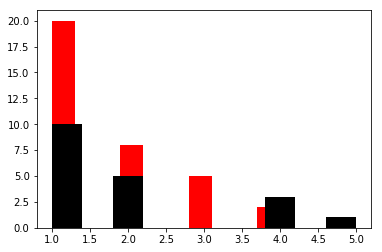

In [27]:
plt.hist(seg_wz_ch_un,color='r');
plt.hist(seg_wz_ch_bi,color='k');

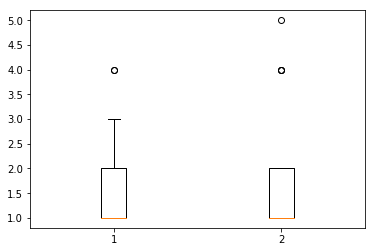

In [28]:
plt.boxplot([seg_wz_ch_un,seg_wz_ch_bi]);

In [29]:
print np.median(seg_wz_ch_bi)
print np.mean(seg_wz_ch_bi)
print ss.variation(seg_wz_ch_bi)

1.0
1.94736842105
0.655370575837


In [30]:
print np.median(seg_wz_ch_un)
print np.mean(seg_wz_ch_un)
print ss.variation(seg_wz_ch_un)

1.0
1.68571428571
0.545014752231


In [31]:
ss.ks_2samp(seg_wz_ch_un,seg_wz_ch_bi)

Ks_2sampResult(statistic=0.15338345864661651, pvalue=0.91083198649049435)

In [32]:
ss.mannwhitneyu(seg_wz_ch_un,seg_wz_ch_bi)

MannwhitneyuResult(statistic=308.0, pvalue=0.31488456605491116)

In [33]:
ques_how_many_bi = 0
for seg in segs_with_zero:
    if seg in segs_bi:
        ques_how_many_bi= ques_how_many_bi+1

In [34]:
print ques_how_many_bi
ques_how_many_bi/39.0

19


0.48717948717948717

In [35]:
temp = (len(segs_with_zero)/2 - ques_how_many_bi);print temp
temp/55.0 ## How man segs from unicross

35


0.6363636363636364

In [36]:
chroms_with_zero = []
for seg in segs_with_zero:
    for a in seg:
        if a in chrlist:
            chroms_with_zero.append(seg)
chroms_with_zero = np.unique(np.concatenate(chroms_with_zero))

In [37]:
print chroms_with_zero

['Chr01' 'Chr02' 'Chr03' 'Chr04' 'Chr05' 'Chr06' 'Chr07' 'Chr08' 'Chr09'
 'Chr10' 'Chr11' 'Chr12' 'Chr13' 'Chr14']


In [38]:
seg_wz_gts = []
for i, seg in enumerate(segs_wz):
    seg_gt = [geno[seg][geno.Chrom==chrom].unique().tolist() for chrom in segs_wz_ch[i]]
    assert len(seg_gt) == len(segs_wz_ch[i])
    seg_wz_gts.append(seg_gt)

In [39]:
all_wz_gts = np.concatenate(np.concatenate(seg_wz_gts))
sum(all_wz_gts)/float(len(segs_wz))

0.64814814814814814

In [40]:
segs_wz_bychrom = [[segs_wz[i] for chrm in chroms] for i,chroms in enumerate(segs_wz_ch) ]

In [41]:
np.concatenate(segs_wz_bychrom)[39]

'SS-B407'

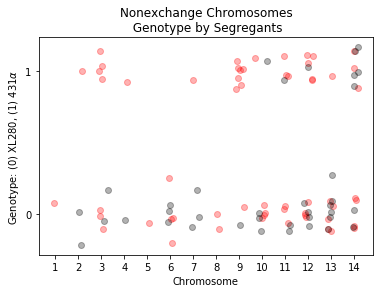

In [42]:
for i, chroms in enumerate(np.concatenate(segs_wz_ch)):
    if np.concatenate(segs_wz_bychrom)[i] in segs_bi:
        colour = 'k'
    else:
        colour = 'r'
    plt.plot(int(chroms[3:])+ np.random.normal(0,0.11,1),#np.log10(clens[int(chroms[3:])-1]) 
             all_wz_gts[i]+np.random.normal(0,0.09,1),
             'o',color=colour,alpha=.3);
plt.xticks(np.arange(1,15,1));
plt.yticks([0,1]);plt.xlabel('Chromosome');plt.title('')
plt.ylabel(r'$\alpha$')
plt.ylabel(r'Genotype: (0) XL280, (1) 431$\alpha$');
plt.title('Nonexchange Chromosomes\n Genotype by Segregants');

In [43]:
len(seg_wz_gts)

54

In [44]:
bi_s_c = [[] for chrom in chrlist]
un_s_c = [[] for chrom in chrlist]
bi_gts = [[] for chrom in chrlist]
un_gts = [[] for chrom in chrlist]
for i, seg in enumerate(segs_wz):
    if seg in segs_bi:
        #bi_gts.append(seg_wz_gts[i])
        for j,c in enumerate(segs_wz_ch[i]):
            bi_s_c[int(c[3:])-1].append(int(c[3:]))
            bi_gts[int(c[3:])-1].append(seg_wz_gts[i][j])
    else:
        #un_gts.append(seg_wz_gts[i])
        for j,c in enumerate(segs_wz_ch[i]):
            un_s_c[int(c[3:])-1].append(int(c[3:]))
            un_gts[int(c[3:])-1].append(seg_wz_gts[i][j])

In [45]:
nun_gts = []
for a in un_gts:
    if len(a) > 0:
        nun_gts.append(list(np.concatenate(a)))
    else:
        nun_gts.append([])
nbi_gts = []
for a in bi_gts:
    if len(a) > 0:
        nbi_gts.append(list(np.concatenate(a)))
    else:
        nbi_gts.append([])

In [46]:
necdf = pd.DataFrame(columns=['Chrom','Counts','C431','Cross'])
necdf['Cross'] = ['un' for i in range(14)] + ['bi' for i in range(14)]
necdf['Chrom'] = [chrom for chrom in chrlist] + [chrom for chrom in chrlist]
necdf['Counts'] = [len(a) for a in nun_gts] + [len(a) for a in nbi_gts]
necdf['C431'] = [sum(a) for a in nun_gts] + [sum(a) for a in nbi_gts]

In [47]:
np.arange(1,15) + 0 + 2*np.arange(0,14)

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40])

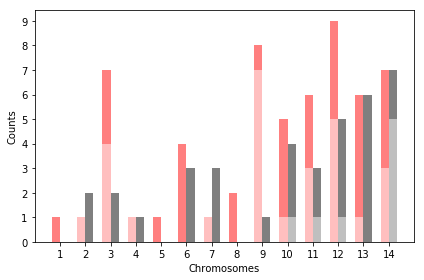

In [48]:
newxtic  = []
W = 10
M = 3*W 
for cr in necdf.Cross.unique():
    for j,chrom in enumerate(necdf.Chrom.unique()):
        if cr is 'un':
            color = 'r'
            xd = 0
        else:
            color = 'k'
            xd = W
            newxtic.append(int(chrom[3:])+xd+M*j)
        plt.bar(int(chrom[3:])+xd+M*j,
                necdf.Counts[(necdf.Chrom==chrom)&
                             (necdf.Cross==cr)],
                width=W,alpha=.5,color=color)
        plt.bar(int(chrom[3:])+xd+M*j,
                necdf.C431[(necdf.Chrom==chrom)&
                             (necdf.Cross==cr)],
                width=W,alpha=.5,color='w')
plt.xticks(np.array(newxtic)-W/2.0,range(1,15));
plt.xlabel('Chromosomes');plt.ylabel('Counts');
plt.yticks(np.arange(0,necdf.Counts.max()+1));plt.tight_layout();

In [49]:
x_un_s_c = []
for a in un_s_c:
    x_un_s_c.append(np.linspace(0,1,len(a)))
x_bi_s_c = []
for a in bi_s_c:
    x_bi_s_c.append(np.linspace(2,3,len(a)))

In [50]:
Y = list(np.concatenate(un_s_c)) + list(np.concatenate(bi_s_c))
X = list(np.concatenate(x_un_s_c)) + list(np.concatenate(x_bi_s_c))
#Z = list(np.concatenate(np.concatenate(un_gts))) + list(np.concatenate(np.concatenate(bi_gts)))

In [51]:
segs_wz_x = []
for i,seg in enumerate(segs_wz):
    if seg in segs_bi:
        segs_wz_x.append([2 for a in segs_wz_ch[i]])
    else:
        segs_wz_x.append([1 for a in segs_wz_ch[i]])

In [52]:
segs_wz_x[:5]

[[1, 1], [1], [1, 1], [1], [1, 1, 1, 1]]

In [53]:
segs_wz_ch[:5]

[['Chr03', 'Chr11'],
 ['Chr13'],
 ['Chr09', 'Chr10'],
 ['Chr06'],
 ['Chr06', 'Chr09', 'Chr13', 'Chr14']]

In [54]:
seg_wz_gts[:5]

[[[1], [1]], [[0]], [[1], [0]], [[0]], [[0], [1], [1], [0]]]

In [55]:
wz_chs = np.concatenate(segs_wz_ch)
wz_gts = np.concatenate(np.concatenate(seg_wz_gts))
wz_x = np.concatenate(segs_wz_x)
x_p = list(np.linspace(-10,10,len(wz_x[wz_x==1]))) + list(np.linspace(15,35,len(wz_x[wz_x==2])))

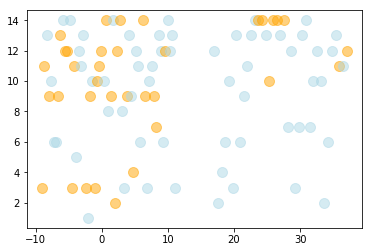

In [56]:
for i in range(len(wz_chs)):
    if wz_gts[i] == 1:
        color='orange'
    else:
        color='lightblue'
    plt.plot(wz_x[i] + x_p[i],int(wz_chs[i][3:]),'o',alpha=.5,markersize=10,color=color);

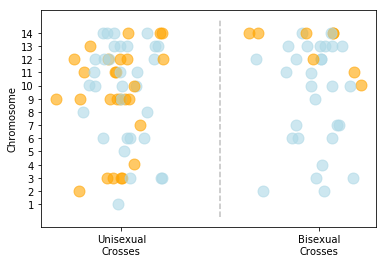

In [57]:
jittx = np.random.normal(0,0.25,len(np.concatenate(segs_wz_ch)));
jitty = np.random.normal(0,0.01,len(np.concatenate(segs_wz_ch)));
for i, chroms in enumerate(np.concatenate(segs_wz_ch)):
    #if np.concatenate(segs_wz_bychrom)[i] in segs_bi:
    if all_wz_gts[i] == 0:
        colour = 'lightblue'
    else:
        colour = 'orange'
    if np.concatenate(segs_wz_bychrom)[i] in segs_bi:
        x = 2;
    else:
        x = 0;
    plt.plot(x+ jittx[i],
             int(chroms[3:])+ jitty[i],
             'o',color=colour,alpha=.6,markersize=11);
plt.yticks(np.arange(1,15,1));
plt.xticks([1,2]);plt.ylabel('Chromosome');
#plt.xlabel('Segregants');
#plt.title('Nonexchange Chromosomes\n Genotype by Cross');
x = [0,2];labels=['Unisexual\nCrosses','Bisexual\nCrosses'];
plt.xticks(x, labels)#, rotation='vertical');
plt.vlines(1,0,15,linestyles='--',color='grey',alpha=.5)
plt.savefig('../FIGS/Crypto-Nonexchange-GT-byCross-Sep2017.png',dpi=300);

The inherited parental genotypes (Blue: XL280, Yellow: 431) of nonexchange chromosomes is shown for progeny from the unisexual (x=1) and bisexual (x=2) crosses across the 14 chromosomes. 

In [58]:
segs_wz_bi = []
segs_wz_un = []
for i, seg in enumerate(segs_wz):
    if seg in segs_bi:
        segs_wz_bi.append(seg_wz_gts[i])
    else:
        segs_wz_un.append(seg_wz_gts[i])

In [59]:
## Bi segs chroms w/z XL280 allele 
print len(np.concatenate(np.concatenate(segs_wz_bi))) - sum(np.concatenate(np.concatenate(segs_wz_bi))),'of',len(np.concatenate(np.concatenate(segs_wz_bi))) 
print 1 - sum(np.concatenate(np.concatenate(segs_wz_bi)))/float(len(np.concatenate(np.concatenate(segs_wz_bi))))

29 of 37
0.783783783784


In [60]:
## Uni segs chroms w/z XL280 allele 
print len(np.concatenate(np.concatenate(segs_wz_un))) - sum(np.concatenate(np.concatenate(segs_wz_un))),'of',len(np.concatenate(np.concatenate(segs_wz_un))) 
print 1 - sum(np.concatenate(np.concatenate(segs_wz_un)))/float(len(np.concatenate(np.concatenate(segs_wz_un))))

32 of 59
0.542372881356


Multiple progeny are seen, across both cross types, with zero crossovers along a given chromosome (nonexchange chromosomes). Here 19 of the 39 (49%) segregants from the bisexual and 35 of the 55 (64%) segregants from the unisexual cross are seen having at least one nonexchange chromosome. There is little difference in the distributions of number of nonexchange chromosomes per segregants across the two cross types (ks-test, p-value > 0.05). For these progeny, the median number of nonexchange chromosomes per segregant, for both progeny from both unisexual and bisexual crosses, is one (the max is five). There seems to be a general trend for smaller chromosomes to appear more often in these segregants as having zero crossovers. Of the 59 nonexchange chromosomes in the 35 progeny from the unisexual crosses, 32 (%54) have the XL280 parental genotype. However, in the 37 nonexchange chromosomes among the 19 progeny from the bisexual crosses, 29 (%78) have the XL280 parental allele. Similar bias towards the XL280 allele was seen in allele frequencies across the bisexual progeny and in regions with distorted allele. Some of these haplotypes with distorted allele frequencies could be represented here.

# CO ANALYSIS

## Seperate the progeny 

In [61]:
len(segs)

94

In [62]:
un = [];bi = [];seg_out = []
for seg in segs:
    if seg not in segs_bi:
        un.append(seg)
    elif seg in segs_bi:
        bi.append(seg)
    else:
        seg_out.append(seg)

In [63]:
len(bi)

39

### Make dataframes for the progeny from the uni- & bi-sexual cross

In [64]:
CO_u = CO_df.T[un]
CO_b = CO_df.T[bi]

In [65]:
CO_u.shape

(14, 55)

In [66]:
CO_b.shape

(14, 39)

In [67]:
CO_anova_df = pd.DataFrame(columns=['Chrom','Chrlen','Cross','N','Seg'],index=range(len(clens)*(len(CO_u.T)+len(CO_b.T))));
CO_anova_df['Chrom'] = np.concatenate([[chrom for a in un + bi] for chrom in chrlist]);
CO_anova_df['Seg'] = np.concatenate([CO_u.columns.tolist()+CO_b.columns.tolist() for chrom in chrlist]);
CO_anova_df['N'] = np.concatenate([CO_u.T[chrom].tolist() + CO_b.T[chrom].tolist() for chrom in chrlist]);
CO_anova_df['Cross'] = np.concatenate([[1 for s in CO_u.columns.tolist()] + [2 for s in CO_b.columns.tolist()] for chrom in chrlist])
CO_anova_df['Chrlen'] = np.concatenate([[cl for i in CO_u.columns.tolist()+CO_b.columns.tolist()] for cl in clens]);

## What is the dispersion (mean to variance ratio)?

In [68]:
for chrom in chrlist:
    temp = np.mean(CO_anova_df[
        CO_anova_df.Chrom==chrom]['N'].values)/np.var(CO_anova_df[
        CO_anova_df.Chrom==chrom]['N'].values,ddof=1)
    print temp

1.39325842697
1.11468163899
1.0481557377
1.26189591078
1.54709042656
1.08400923887
1.40306763892
1.33475021253
1.41939586645
1.24592656963
1.41601178782
1.44065529923
1.52651515152
1.5618645036


#### The values above suggest the data is under disperesed. 

## Distribution of crossover counts and test for normality

In [69]:
for chrom in chrlist:
    print chrom,ss.normaltest(CO_anova_df[CO_anova_df.Chrom == chrom]['N'].values)

Chr01 NormaltestResult(statistic=1.113638799380622, pvalue=0.57302874387759783)
Chr02 NormaltestResult(statistic=4.8342885082070177, pvalue=0.089175917939507257)
Chr03 NormaltestResult(statistic=2.8956278184581339, pvalue=0.23508364094926196)
Chr04 NormaltestResult(statistic=3.9001232176114988, pvalue=0.14226530652087938)
Chr05 NormaltestResult(statistic=9.6354224571683638, pvalue=0.0080852713158797319)
Chr06 NormaltestResult(statistic=6.0617588549904866, pvalue=0.048273166703455155)
Chr07 NormaltestResult(statistic=4.0879542994500948, pvalue=0.12951259424358924)
Chr08 NormaltestResult(statistic=2.5889146235066653, pvalue=0.2740465458234056)
Chr09 NormaltestResult(statistic=1.0321317884651657, pvalue=0.59686406147923532)
Chr10 NormaltestResult(statistic=9.3044178469014618, pvalue=0.0095405043938129007)
Chr11 NormaltestResult(statistic=2.1551162210756454, pvalue=0.34042579367923409)
Chr12 NormaltestResult(statistic=7.8582884659065382, pvalue=0.019660490155661684)
Chr13 NormaltestResult(

In [70]:
mannxchrom = [ss.mannwhitneyu(CO_u.T[chrom].values,CO_b.T[chrom].values) for chrom in chrlist]

In [71]:
from statsmodels.sandbox.stats.multicomp import multipletests as mltptest

In [72]:
mann_fdr_step_down_res = mltptest([mannxchrom[i][1] for i in range(14)],method='hs',alpha=0.05)

In [73]:
[chrom for i, chrom in enumerate(chrlist) if mann_fdr_step_down_res[0][i] == True]

['Chr01', 'Chr02', 'Chr03', 'Chr04', 'Chr05', 'Chr08', 'Chr09']

In [74]:
max(mann_fdr_step_down_res[1][mann_fdr_step_down_res[0]])

0.041809148110919736

## View Dataframes

#### The segregants from the unisexual cross

# ANOVA

## Make dataframe for use in anova
### Concatinate all information

In [5]:
myfilename = '../FILES/Crypto-GTC-co-anova-df'+endfile

In [6]:
myfilename

'../FILES/Crypto-GTC-co-anova-df-min-haplotype-k6000.csv'

In [77]:
CO_anova_df.to_csv(myfilename,index=False)

In [7]:
CO_anova_df = pd.read_csv(myfilename)

## PATCH Feb 13th 
#### This patch corrects for miss counts along chrom 7 due to NAT and URA5 markers

In [10]:
chrom_7_nocorrect = ['SS-B' + str(a) for a in [600,591,589]]
chrom_7_nocorrect

['SS-B600', 'SS-B591', 'SS-B589']

In [8]:
CO_anova_df

,Chrom,Chrlen,Cross,N,Seg
0,Chr01,2300525,1,1.0,SS-B307
1,Chr01,2300525,1,2.0,SS-B308
2,Chr01,2300525,1,1.0,SS-B310
3,Chr01,2300525,1,3.0,SS-B311
4,Chr01,2300525,1,4.0,SS-B312
5,Chr01,2300525,1,3.0,SS-B313
6,Chr01,2300525,1,4.0,SS-B314
7,Chr01,2300525,1,5.0,SS-B315
8,Chr01,2300525,1,3.0,SS-B316
9,Chr01,2300525,1,3.0,SS-B317


In [80]:
CO_anova_df['LogT'] = np.log(CO_anova_df.N.values+1)

In [81]:
CO_anova_df['TChrlen'] = np.log10(CO_anova_df.Chrlen.values)

## Fit a linear model 

#### This is the full model

In [82]:
CO_anova_df.N.sum()

3297.0

In [83]:
anova_fit = smf.ols(formula='N ~ Chrlen + C(Cross) + Chrlen*C(Cross)',data=CO_anova_df).fit()
#anova_fit2 = smf.ols(formula='LogT ~ Chrlen + C(Cross) + Chrlen*C(Cross)',data=CO_anova_df).fit()
#anova_fit3 = smf.ols(formula='N ~ TChrlen + C(Cross) + Chrlen*C(Cross)',data=CO_anova_df).fit()

#### Fit a model with no interaction (for the species rate).

### View the results of the ANOVA

In [84]:
print anova_fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     147.1
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           3.69e-82
Time:                        11:01:10   Log-Likelihood:                -2268.4
No. Observations:                1316   AIC:                             4545.
Df Residuals:                    1312   BIC:                             4565.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5330 

#### The intercepts are significantly above zero but not different from eachother ( No difference between cross type ). Chromosome length is significant contributor to the amount of recombination, as expected. There is also significant interactions between cross type and chromosome length. This implies difference in the expected recombination rate between the two set of progeny.

In [85]:
anova_fit.pvalues

Intercept               6.138127e-04
C(Cross)[T.2]           2.974106e-01
Chrlen                  7.193944e-29
Chrlen:C(Cross)[T.2]    3.510936e-05
dtype: float64

## Make dataframe with basic stats on recombination information

In [86]:
crosses = ('Alpha x Alpha','A x Alpha');
colors = ('red','black');
N_totals = [len(CO_u.columns.tolist()) for c in range(len(clens))] + [ len(CO_b.columns.tolist()) for c in range(len(clens))]
statsdf = pd.DataFrame(columns=['Chrom','ChrLen','Cross','Total','N','Mean','Median','Max','Min','Std','Sem','Colors']);
statsdf.Chrom = [chrom for cross in crosses for chrom in chrlist ];
statsdf.ChrLen = [clens[c] for cross in crosses for c,chrom in enumerate(chrlist) ];
statsdf.Cross = [cross for cross in crosses for chrom in chrlist];
statsdf.Total = [CO_u.sum(axis=1)[chrom] for chrom in chrlist] + [CO_b.sum(axis=1)[chrom] for chrom in chrlist];
statsdf.N = N_totals#[len(CO_u.T) for chrom in chrlist] + [len(CO_b.T) for chrom in chrlist];assert statsdf.N[0] == len(uni)
statsdf.Mean = [statsdf.Total.T[i]/float(statsdf.N[i]) for i in statsdf.index.tolist()];
statsdf.Median = [np.median(CO_u.T[chrom].tolist()) for chrom in chrlist] + [np.median(CO_b.T[chrom].tolist()) for chrom in chrlist] 
statsdf.Max = [max(CO_u.T[chrom].tolist()) for chrom in chrlist] + [max(CO_b.T[chrom].tolist()) for chrom in chrlist] 
statsdf.Min = [min(CO_u.T[chrom].tolist()) for chrom in chrlist] + [min(CO_b.T[chrom].tolist()) for chrom in chrlist] 
statsdf.Std = [CO_u.T.std()[chrom] for chrom in chrlist] + [CO_b.T.std()[chrom] for chrom in chrlist];
statsdf.Sem = [CO_u.T.sem()[chrom] for chrom in chrlist] + [CO_b.T.sem()[chrom] for chrom in chrlist];
statsdf.Colors = [ colors[0] for chrom in chrlist] + [ colors[1] for chrom in chrlist];
statsdf.to_csv('../FILES/Crypto-GTC-STATS-May2017%s.csv'%endfile);

### View statistics

In [87]:
statsdf

,Chrom,ChrLen,Cross,Total,N,Mean,Median,Max,Min,Std,Sem,Colors
0,Chr01,2300525,Alpha x Alpha,191.0,55,3.472727,3.0,8.0,0.0,1.425360,0.192195,red
1,Chr02,1632286,Alpha x Alpha,149.0,55,2.709091,3.0,6.0,0.0,1.328780,0.179173,red
2,Chr03,2105722,Alpha x Alpha,169.0,55,3.072727,3.0,6.0,0.0,1.573561,0.212179,red
3,Chr04,1783051,Alpha x Alpha,141.0,55,2.563636,2.0,6.0,0.0,1.228725,0.165681,red
4,Chr05,1507536,Alpha x Alpha,117.0,55,2.127273,2.0,4.0,0.0,0.903789,0.121867,red
5,Chr06,1438940,Alpha x Alpha,120.0,55,2.181818,2.0,5.0,0.0,1.292298,0.174253,red
6,Chr07,1347778,Alpha x Alpha,145.0,55,2.636364,3.0,5.0,0.0,1.237734,0.166896,red
7,Chr08,1194303,Alpha x Alpha,139.0,55,2.527273,2.0,5.0,0.0,1.214946,0.163823,red
8,Chr09,1178642,Alpha x Alpha,91.0,55,1.654545,2.0,3.0,0.0,1.022310,0.137848,red
9,Chr10,1085711,Alpha x Alpha,97.0,55,1.763636,2.0,4.0,0.0,0.980620,0.132227,red


In [88]:
statsdf.Total.sum()

3297.0

## Generate models
### Assign model variables for each cross ie slope and intercept.

In [89]:
anova_fit.conf_int().ix[2,:]*1000000

anova_fit.conf_int().ix[-1,:]*1000000 + anova_fit.params[2]*1000000
print ""
## Unisexual cross
unint = anova_fit.params[0];print unint
unslo = anova_fit.params[2];print unslo * 1000000

print ""
## bisexual cross
biint = anova_fit.params[0] + anova_fit.params[1];print biint
bislo = anova_fit.params[2] + anova_fit.params[3];print bislo * 1000000


0.533046388943
1.23639983684

0.281818843717
1.93417840436


/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


## Construct regression predictions for each cross

### make x range

In [90]:
kb = 1000
max_b = 2500000
x_range = np.arange(0,int(max_b),kb)

In [91]:
reg_un = unslo*x_range + unint
reg_bi = bislo*x_range + biint
#reg_all = [fitresult.params[1]*x + fitresult.params[0] for x in x_range]

In [92]:
reg_bi[0]

0.281818843717065

In [93]:
reg_un[0]

0.53304638894256773

### Plot our results

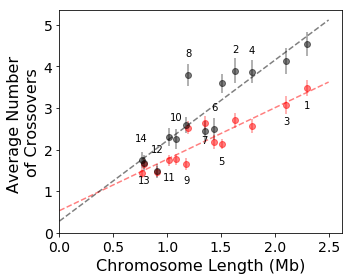

In [94]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
## Uni-sexual
plt.plot(x_range,reg_un,'--',color=colors[0],alpha=.5);
plt.plot(statsdf.ChrLen[statsdf.Cross=='Alpha x Alpha'].values,
         statsdf.Mean[statsdf.Cross=='Alpha x Alpha'],'o',color=colors[0],
         alpha=.5,label= r'$\alpha\  x\  \alpha$')
## Bi-sexual
plt.plot(x_range,reg_bi,'--',color=colors[1],alpha=.5);
plt.plot(statsdf.ChrLen[statsdf.Cross=='A x Alpha'].values,
         statsdf.Mean[statsdf.Cross=='A x Alpha'],'o',color=colors[1],
         alpha=.5,label= r'$\alpha\  x\  a$');
plt.xlabel('Chromosome Length (Mb)',fontsize=16);
plt.ylabel('Average Number \nof Crossovers',fontsize=16);
#plt.title('Crossovers vs\nChromosome Length ',fontsize=21);
plt.vlines(x = statsdf.ChrLen.values,
           ymin = statsdf.Mean.values - statsdf.Sem.values,
           ymax = statsdf.Mean.values + statsdf.Sem.values,
           linewidth = 2, colors = statsdf.Colors.tolist(), alpha = .3);
#plt.legend(loc='lower right',markerscale=1.5, fontsize=14);
plt.tick_params(labelsize=14);plt.ylim(0,);plt.xlim(0,);
for ch,clen in enumerate(clens):
    I = 0.4
    if ch % 2 == 0:
        I = -I
        plt.annotate(ch+1,(clen,
                           float(statsdf.Mean[(statsdf.Cross=='Alpha x Alpha')&
                                              (statsdf.Chrom==chrlist[ch])]) + I),
                     horizontalalignment='center',verticalalignment='center');
    else:
        plt.annotate(ch+1,(clen,
                           float(statsdf.Mean[(statsdf.Cross=='A x Alpha')&
                                              (statsdf.Chrom==chrlist[ch])]) + I),
                     horizontalalignment='center',verticalalignment='right');
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
ax.set_xticklabels(np.arange(0.0,3.0,0.5))
plt.tight_layout();
plt.savefig('../FIGS/Crypto-Genome-Wide-GTC'+ endfile[:-4] + '.png',dpi=600,);

In [95]:
##### Intercepts

I1 = unint;print " Unisexual:",I1
I2 = biint;print "  Bisexual:",I2
#I3 = fitresult.params.Intercept;print "Crypto Int:",I3 ## All
#print "         Intercepts"

##### Slope
print ""
s1 = (unslo)*(kb**2);print "Uni:", s1
s2 = (bislo)*(kb**2);print "Bi:",s2
#s3 = fitresult.params[1]*(kb**2);print "All:",s3

##### kb/ cM
print ""
cm1 = .01/(unslo)/kb
cm2 = .01/(bislo)/kb
#cm3 = .01/(fitresult.params[1])/kb
print "        kb/ cM"
print "   Uni-",cm1
print "    Bi-",cm2
#print "Crypto-",cm3 

 Unisexual: 0.533046388943
  Bisexual: 0.281818843717

Uni: 1.23639983684
Bi: 1.93417840436

        kb/ cM
   Uni- 8.08799847914
    Bi- 5.17015388936


### Save results

In [96]:
results_df = pd.DataFrame(columns=['Intercept','Slope','cM'],index=['Uni','Bi']);
results_df['Intercept'] = [I1,I2];results_df['Slope'] = [s1,s2];results_df['cM'] = [cm1,cm2];
results_df.to_csv('../FILES/Crypto-Genome-wide-Analysis-Linear-results%s'%endfile);
results_df

,Intercept,Slope,cM
Uni,0.533046,1.236400,8.087998
Bi,0.281819,1.934178,5.170154


## Facet Wrap like plot of crossover Disributions via chrom, colored by cross type

In [98]:
#new_chrom_label = ['Chromosome ' + str(int(chrom[3:])) for chrom in chrlist]


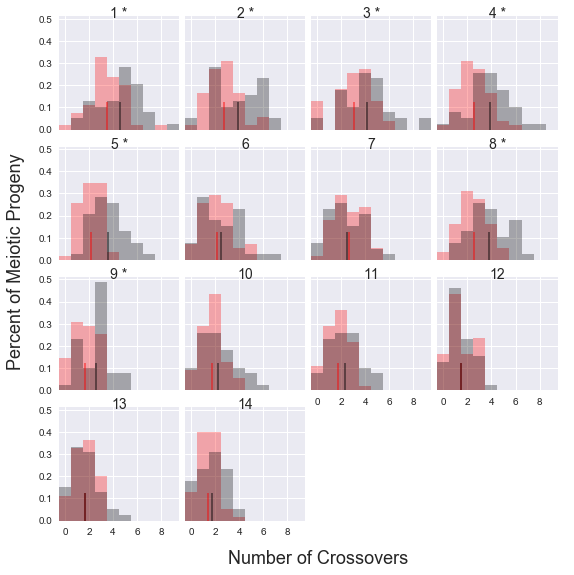

In [106]:
import seaborn as sns
sns.set()
new_chrom_label = [str(int(chrom[3:])) for chrom in chrlist]
fig,ax = plt.subplots(4,4,figsize=(8,8),sharey=True); ## Call figure
bins = np.arange(-0.5,CO_anova_df.N.max()+1.5); ## Center bins on each integer from 0 to 10
tall = .125 ## Set variable for how tall the vertical lines representing the means shall be. 
for i,chrom in enumerate(chrlist): ## For each chromsome ... 
    plt.sca(ax.ravel()[i]); ## Get axis 
    x1 = CO_anova_df[(CO_anova_df.Chrom==chrom)&(CO_anova_df.Cross==1)]['N'].values; ## Get data for segs from unisexual reproduction
    x2 = CO_anova_df[(CO_anova_df.Chrom==chrom)&(CO_anova_df.Cross==2)]['N'].values; ## "" bisexual reproduction
    plt.hist(x1,bins=bins,color='r',alpha=.3,normed=True); ## plot dist for segs from uni cross
    plt.hist(x2,bins=bins,color='k',alpha=.3,normed=True); ## " " from bi cross 
    if mann_fdr_step_down_res[0][i] == True:
        chrom_label = new_chrom_label[i] + ' *';
    else:
        chrom_label = new_chrom_label[i]
    plt.text(0.5, 1.02,chrom_label, horizontalalignment='center', ## Label each subplot with the chromosome
                 verticalalignment='center', ## Align text centered vertically
                 transform = plt.gca().transAxes,fontsize=14); ## Turn axis to ratio
    plt.vlines(np.mean(x1),0,tall,'red',alpha=.5);plt.vlines(np.mean(x2),0,tall,'k',alpha=.5);
    #plt.gca().set_facecolor('lightgrey');
    #plt.gca().grid(color='w', linestyle='-', linewidth=.5,alpha=.8);
    for a in ['top','bottom','left','right']:
        plt.gca().spines[a].set_visible(False);
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5]);
    plt.xticks([0,2,4,6,8,10]); ## Set x and y ticks 
    plt.xlim(-.5,np.max(bins));#plt.ylim(0,25); ## Set x and y lims
    plt.tight_layout(); ## force a tight layout
    if i < 10: ## Turn off x axis for subplots not on bottom. 
        plt.gca().grid(True); ## Keep the grid in the background of these first plots
        plt.gca().set_xticklabels([]); ## Set their x ticks to none
for i in [14,15]: ## Turn off the two empty subplots
    plt.sca(ax.ravel()[i]); ## Get the axis
    plt.axis('off'); ## Turn it off. 
plt.subplots_adjust(wspace=0.05,hspace=0.15); ## Adjust space between subplots
plt.gcf().subplots_adjust(bottom=0.1);plt.gcf().subplots_adjust(left=0.1);
fig.text(0.55, 0.025, 'Number of Crossovers', ha='center',fontsize=18);
#fig.text(0.025, 0.5, 'Frequency Among Meiotic Progeny',
fig.text(0.01,0.55,'Percent of Meiotic Progeny',va='center', rotation='vertical',fontsize=18);
plt.savefig('../FIGS/Crypto-02-GTC-Distributions.png',dpi=1200);

In [ ]:
plt.close()

In [ ]:
CO_anova_df[CO_anova_df.N==CO_anova_df.N.max()]

# Preform Log linear regression analysis

In [ ]:
log_CO_df = pd.DataFrame(index=range(2*len(clens)))
log_CO_df['Chrom'] = [chrom for chrom in chrlist for i in [1,2]]
log_CO_df['Chrlen'] = [cln for cln in clens for i  in [1,2]]
log_CO_df['Cross'] = [i for cln in clens for i in [1,2]]

In [ ]:
log_CO_df['EN'] = [CO_anova_df.N[(CO_anova_df.Chrlen==clen)&
                                 (CO_anova_df.Cross==i)].mean() 
                       for clen in clens for i in [1,2]]
log_CO_df['LogEN'] = [np.log(CO_anova_df.N[(CO_anova_df.Chrlen==clen)&
                                           (CO_anova_df.Cross==i)].mean()) 
                          for clen in clens for i in [1,2]]
log_CO_df['Var'] = [np.var(CO_anova_df.N[(CO_anova_df.Chrlen==clen)&
                                 (CO_anova_df.Cross==i)],ddof=1) 
                        for clen in clens for i in [1,2]]
log_CO_df['Disp'] = [log_CO_df.EN[i]/log_CO_df.Var[i] for i in range(2*len(clens))]

In [ ]:
log_CO_df.head()

In [ ]:
Fitresult_log = smf.ols(formula = 'LogEN ~ C(Cross) + Chrlen',data=log_CO_df).fit();
print Fitresult_log.summary();mypvalu2 = Fitresult_log.pvalues[1];print mypvalu2

In [ ]:
#fig, ax = plt.subplots(1,1,figsize=(5,4));
sns.set(font_scale=2.5)
rp = sns.lmplot(x="Chrlen",y="LogEN",
                hue="Cross",palette=['red','black'],
                legend=False,size=12,
                data=log_CO_df);#rp.axes.set_ylim(0,)#rp.axes.set_xlim(0,)
#labels = [item.get_text() for item in rp.get_xticklabels()]
labels = [0,0.8,1.0,1.2,1.4,1.6,1.9,2.0,2.2];
rp.set_xticklabels(labels);
plt.ylabel(' ')#plt.ylabel("$\log$[ $E$ (# of Crossovers)]",fontsize=25);
plt.xlabel(' ')#plt.xlabel('Chromosome Length (Mb)',fontsize=25);
for ch,clen in enumerate(clens):
    I = -0.09
    if ch in [1,6,10]:#ch % 2 == 0:
        I = -I
        rp.ax.annotate(str(ch+1),
                       (clen,
                        float(log_CO_df.LogEN[(log_CO_df.Cross==1)&
                                              (log_CO_df.Chrom==chrlist[ch])]) + I),
                     horizontalalignment='center',verticalalignment='center');
    else:
        rp.ax.annotate(str(ch+1),
                       (clen,
                        float(log_CO_df.LogEN[(log_CO_df.Cross==1)&
                                              (log_CO_df.Chrom==chrlist[ch])]) + I),
                     horizontalalignment='center',verticalalignment='center');

plt.tight_layout();
plt.savefig('../FIGS/Crypto-Genome-Wide-GTC-min-haplotype-k6000-Sep2017.png',dpi=600);